In [1]:
from os import environ
environ['OMP_NUM_THREADS'] = '1'

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
from tqdm.notebook import trange
from scipy import linalg

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [7]:
N_TRIES = 10
times = []

for p in trange(5, 12):
    n = 2 ** p 
    results = []

    for _ in range(N_TRIES):
        A = np.random.normal(0, 1, size=(n, n))

        time_start = time.process_time()
        linalg.eig(A)
        time_end = time.process_time()

        results.append(time_end - time_start)

    times.append({
        'n': n,
        'time': np.mean(results).item()
    })


  0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
df_results = pd.DataFrame.from_records(times)

<Axes: xlabel='n', ylabel='time'>

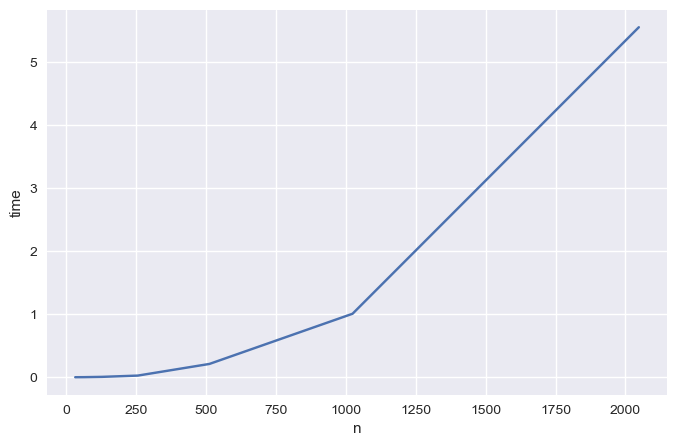

In [9]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

sns.lineplot(df_results, x='n', y='time', ax=ax)